<a href="https://colab.research.google.com/github/dturvey11/PyTorch-Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

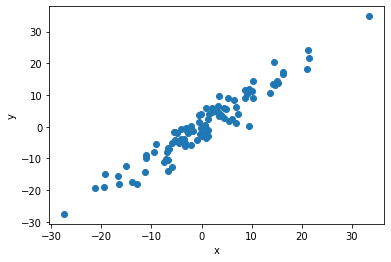

In [3]:
x = torch.randn(100, 1)*10
y = x + 3*torch.randn(100, 1)
plt.plot(x.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [4]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [5]:
torch.manual_seed(1)
model = LR(1,1)

In [6]:
[w, b] = model.parameters()

def get_params():
  return (w[0][0].item(), b[0].item())

In [7]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(x, y)
  plt.show()

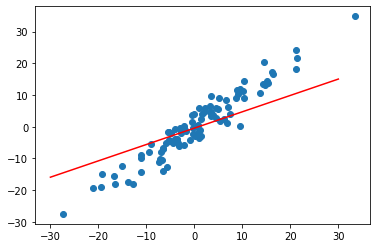

In [8]:
plot_fit('Initial Model')

In [9]:
criteria = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [10]:
epochs = 100
losses =[]
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criteria(y_pred, y)
  print("epoch:", i, "loss:", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 32.00376510620117
epoch: 1 loss: 30.145244598388672
epoch: 2 loss: 28.434009552001953
epoch: 3 loss: 26.85843276977539
epoch: 4 loss: 25.407690048217773
epoch: 5 loss: 24.071924209594727
epoch: 6 loss: 22.84197425842285
epoch: 7 loss: 21.70947265625
epoch: 8 loss: 20.66668701171875
epoch: 9 loss: 19.706483840942383
epoch: 10 loss: 18.82229995727539
epoch: 11 loss: 18.008140563964844
epoch: 12 loss: 17.258441925048828
epoch: 13 loss: 16.568078994750977
epoch: 14 loss: 15.932352066040039
epoch: 15 loss: 15.34693717956543
epoch: 16 loss: 14.807822227478027
epoch: 17 loss: 14.311352729797363
epoch: 18 loss: 13.854150772094727
epoch: 19 loss: 13.433096885681152
epoch: 20 loss: 13.045327186584473
epoch: 21 loss: 12.688201904296875
epoch: 22 loss: 12.359299659729004
epoch: 23 loss: 12.056379318237305
epoch: 24 loss: 11.777379035949707
epoch: 25 loss: 11.520411491394043
epoch: 26 loss: 11.283727645874023
epoch: 27 loss: 11.065718650817871
epoch: 28 loss: 10.864910125732422
epoch

Text(0.5, 0, 'epoch')

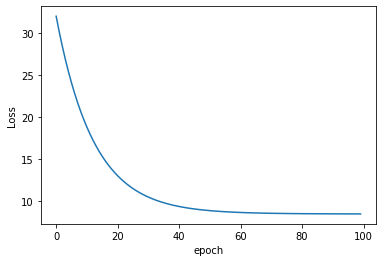

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

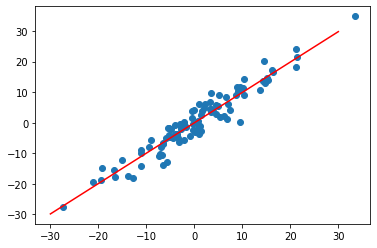

In [14]:
plot_fit("Trained Model")